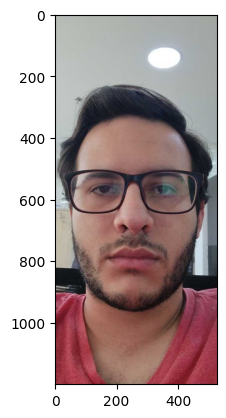

1/1 [==============================] - 2s 2s/step


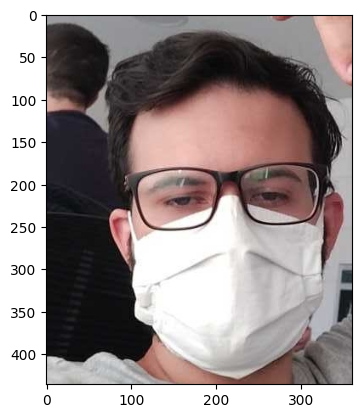

1/1 [==============================] - 0s 185ms/step
A imagem 'marcelinho_na_inferencia.jpg' foi reconhecida no banco2.


In [ ]:
!pip install keras
!pip install numpy
!pip install scipy

from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import os ft

# Função para carregar um arquivo zip
def carregar_zip(banco_fotos):
    with zipfile.ZipFile(banco_fotos, 'r') as zip_ref:
        zip_ref.extractall()

# Carregar o modelo resnet50
modelo = ResNet50(weights='imagenet', include_top=False)

# Função para processar as imagens
def processar_imagem(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Função para extrair características
def extrair_caracteristicas(img_path, modelo):
    x = processar_imagem(img_path)
    features = modelo.predict(x)
    return features.flatten()

# Processar as imagens na pasta 'banco'
banco2 = []
for subdir, dirs, files in os.walk('banco_fotos'):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".jpg"):
            features = extrair_caracteristicas(filepath, modelo)
            banco2.append(features)

# Carregar e visualizar a imagem 'marcelinho_no_db.jpg'
img1 = mpimg.imread('marcelinho_no_db.jpg')
plt.imshow(img1)
plt.show()

# Aplicar a função do modelo resnet50 nela e salvar suas características no 'banco2'
features1 = extrair_caracteristicas('marcelinho_no_db.jpg', modelo)
banco2.append(features1)

# Carregar e visualizar a imagem 'marcelinho_na_inferencia.jpg'
img2 = mpimg.imread('marcelinho_na_inferencia.jpg')
plt.imshow(img2)
plt.show()

# Aplicar o processamento de imagem resnet50, extrair características e comparar com 'banco2'
features2 = extrair_caracteristicas('marcelinho_na_inferencia.jpg', modelo)
distancias = [distance.euclidean(features2, feat) for feat in banco2]
indice_mais_proximo = np.argmin(distancias)
if distancias[indice_mais_proximo] < 645.0:
    print("A imagem 'marcelinho_na_inferencia.jpg' foi reconhecida no banco2.")
else:
    print("A imagem 'marcelinho_na_inferencia.jpg' não foi reconhecida no banco2.")
